## Question 1

There are 11 features or input features that can be used to determine the quality of the red wine namely:

   1. volatile acidity : Volatile acidity is the gaseous acids present in wine.
   2. fixed acidity :   Primary fixed acids found in wine are tartaric,               succinic, citric, and malic
   3. residual sugar :   Amount of sugar left after fermentation.
   4. citric acid :    It is weak organic acid, found in citrus fruits               naturally.
   5. chlorides :   Amount of salt present in wine.
   6. free sulfur dioxide :   So2 is used for prevention of wine by oxidation         and microbial spoilage.
   7. total sulfur dioxide 
   8. pH :   In wine pH is used for checking acidity
   9. density 
   10. sulphates :    Added sulfites preserve freshness and protect wine from          oxidation, and bacteria.
   11. alcohol :   Percent of alcohol present in wine.

## Question 2

For handling the missing data we first check the missing values present by using the df.isna().sum(). It gives the total number of missing values in our dataset. But the wine quality datset is quite beginner friendly it does not have any missing values present.

There are various imputation techniques that can be implemented to handle missing data:

1. Complete Case Analysis: removing the rows that have missing data. Its advantage is that its easy to implement and no data manipulation is required. But the deleted data can be informative and it can lead to deletion of large part of data which can lead to creation of a bias in the dataset.

2. Arbitrary value imputation or mean/median imputation: can handle both numerical and categorical data. we fill the missing datapoints with either an arbitrary value or the mean or median of the column depending upon the dataset. It is easy to use and can be used in production. It also retains the importance of missing values if existant. Its limitations are that it can distort original variable distribution, the arbitrary values can create outliers.

3. Frequent Category imputation/mode imputation: It replaces the missing value with the variable with the highest frequency or the mode of the column. Its implementation is easy and can be used in production. But it may lead to over-representation of a particular category and can distort the original distribution.

## Question 3

The features that are present in the student performance dataset are namely:
   
    1. gender
    2. race/ethnicity
    3. parental_level_of_education 
    4. lunch
    5. test_preparation_course   
    6. math_score
    7. reading_score
    8. writing_score 
We analyze the statistics of data using df.describe() we see that for the numerical data all the means are quite close to each other falling between 66 and 69. All the standard deviation of the data are close and in the range 14.6 to 15.19. We do not have any duplicates for the data and although the minimum marks are obtained in maths that is 0 but the minimum for reading and writing are substantially higher 17 and 10.

## Question 4

Firstly we check for the missing values that might be present in our dataset using df.isnull().sum() or df.isna().sum(). For student performance dataset we don not have any missing values present. Therefore we move forward to check for importance of particular features by seeing their correlation with each other using df.corr() and plotting a heatmap. We get the relationship between the numerical features of the dataset.

We can segregate the datset into numerical and categorical features by checking their datatypes(dtype). For using these features for our model we have to convert the categorical data into integer values for our model to understand therefore we can use techniques like Label Encoding and One Hot Encoding.

Features are then scaled using standardization techniques so we get a standard distribution with mean 0 and standard deviation of 1.

## Question 5

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('winequality-red.csv')

In [2]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [5]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

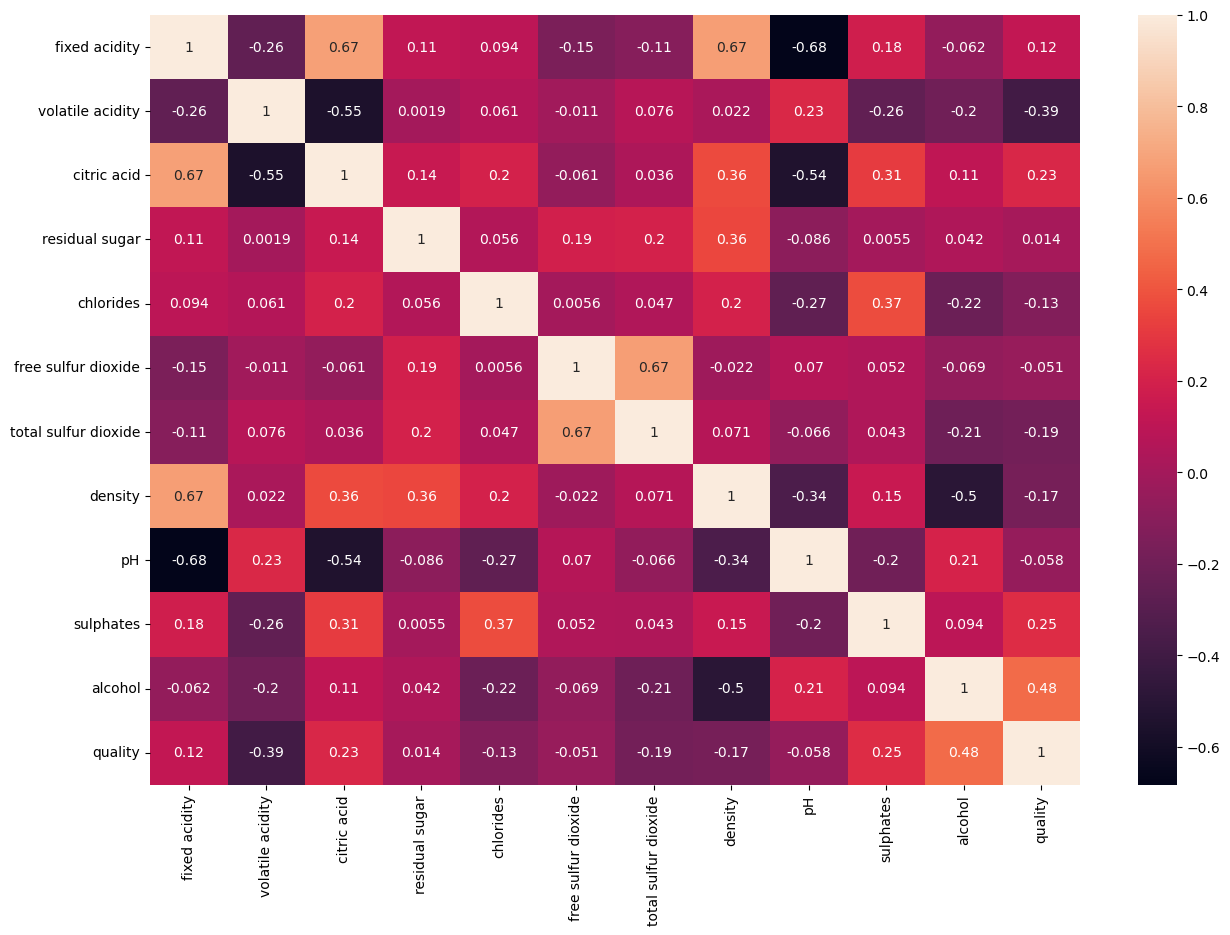

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

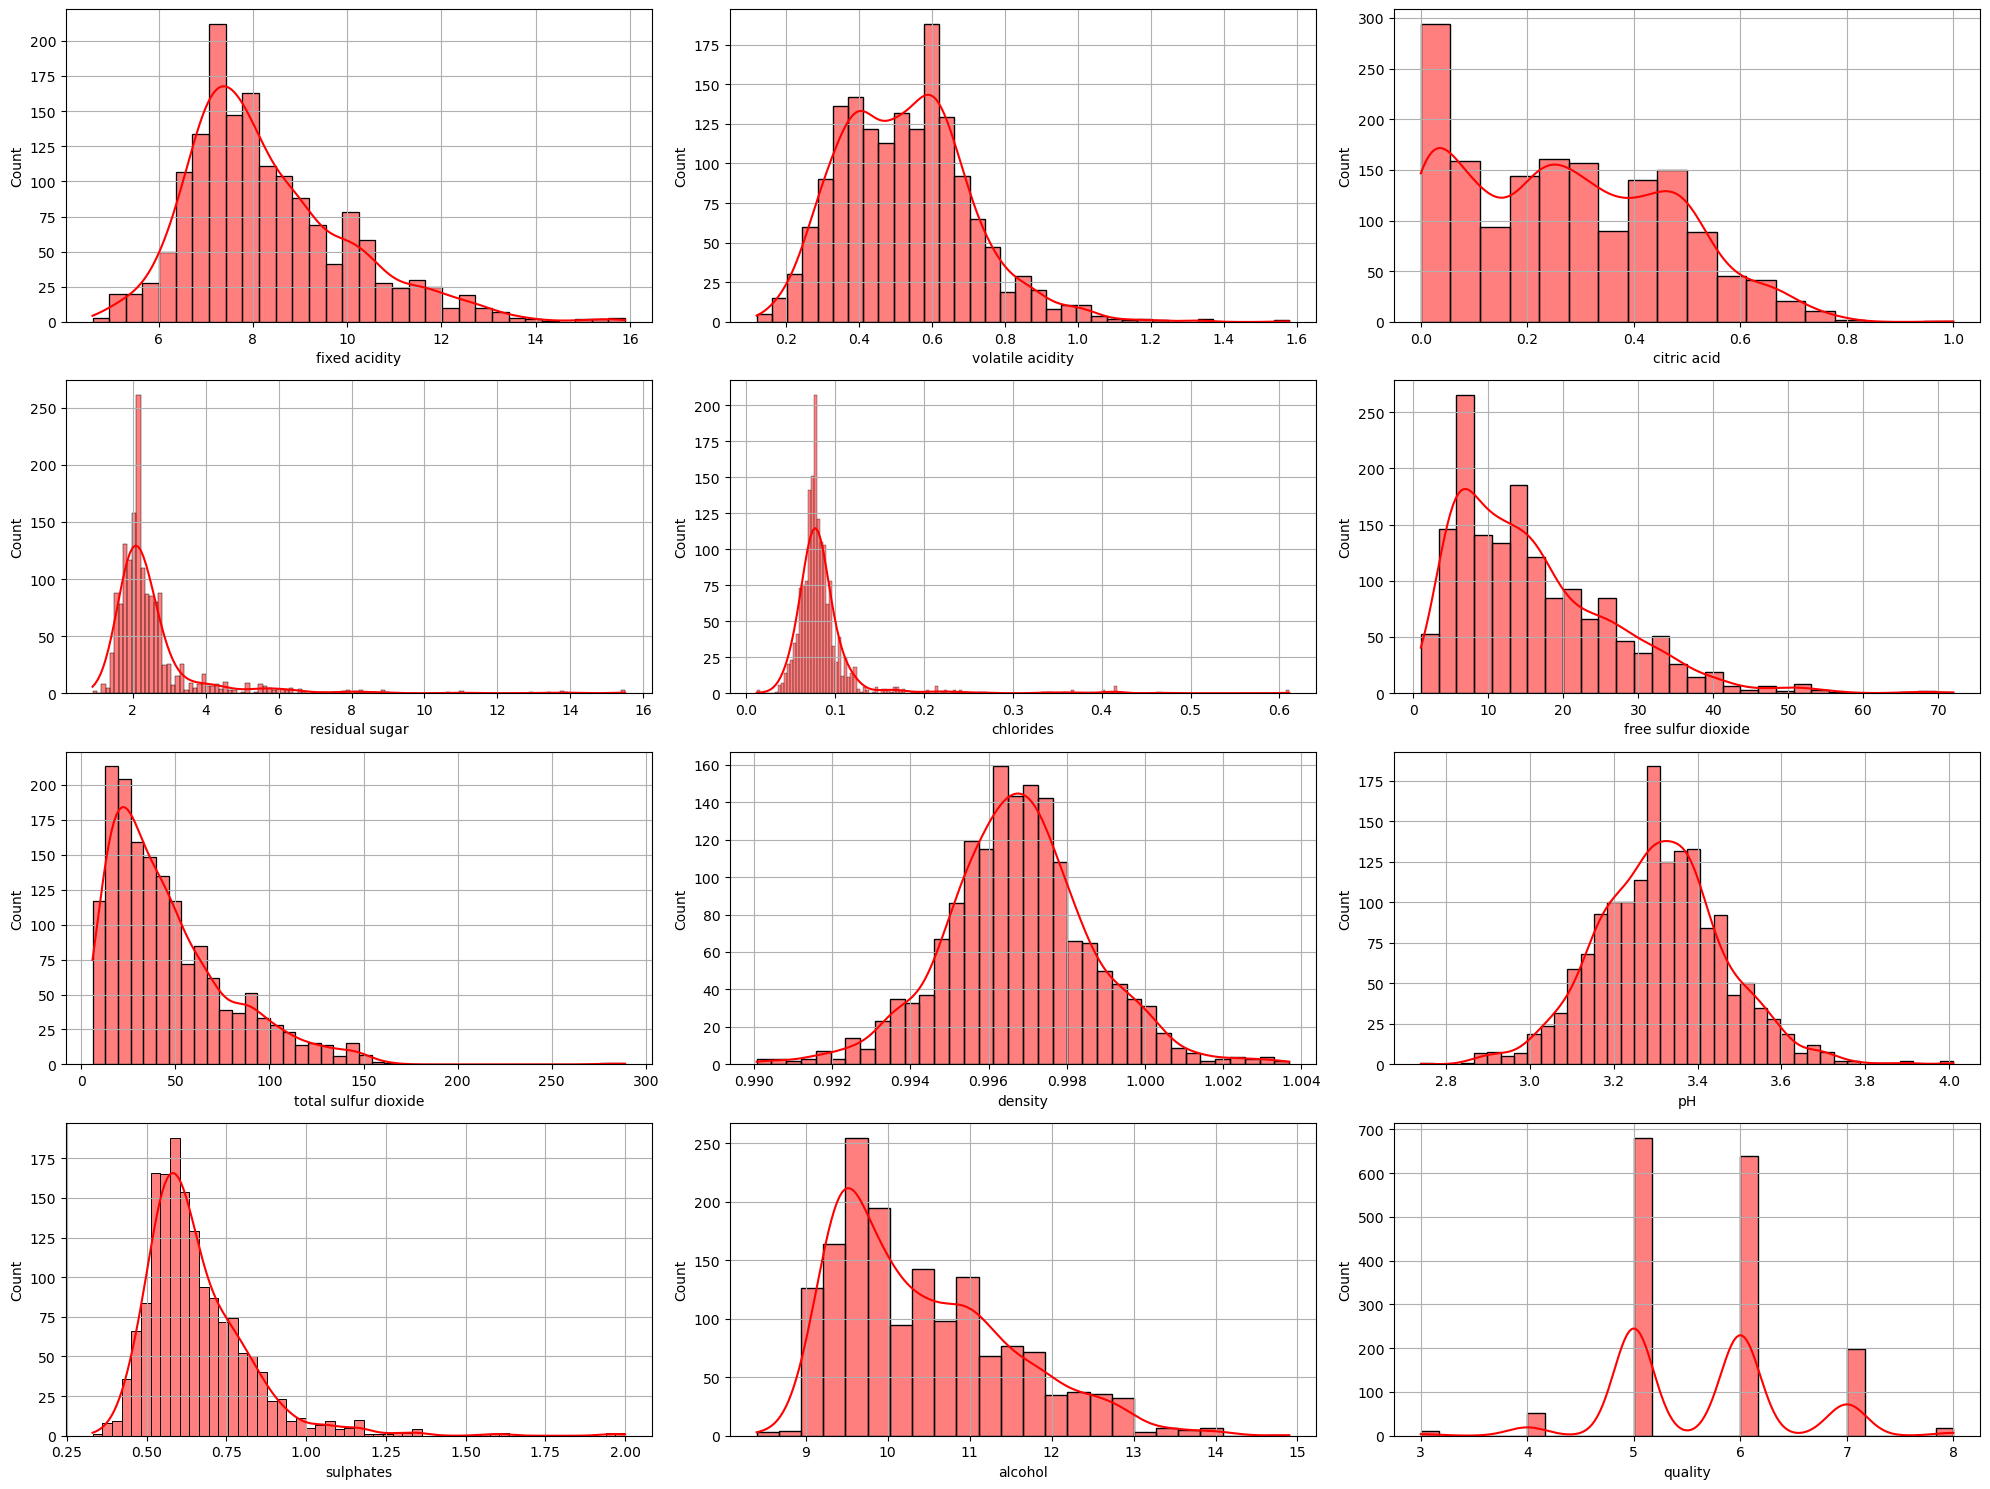

In [9]:
plt.figure(figsize=(20,15))
for i, col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True,color='r')
    plt.grid()
    plt.tight_layout()

## Insights
seeing the above graphs we can tell that for the given data the features pH and density are normally distributed while remaining all independant features are positively skewed

The fixed_acidity feature is skewed towards the right, 
volatile acidity is quite similar to a normal distribution,
citric acid, Sulphates, alchohol,total sulphur dioxide, free sulphur dioxide, chlorides, residual sugars: right skewed data , having outliers.

To improve the normality of these distributions we can remove the outliers or the extreme data points so that the data is not skewed, we can also perform min max scaling or standard scaling to normalize the data. Other methods of transformation include box-cox transformation, logarithmic, square-root, reciprocal, and exponential transformation.

## Question 6

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


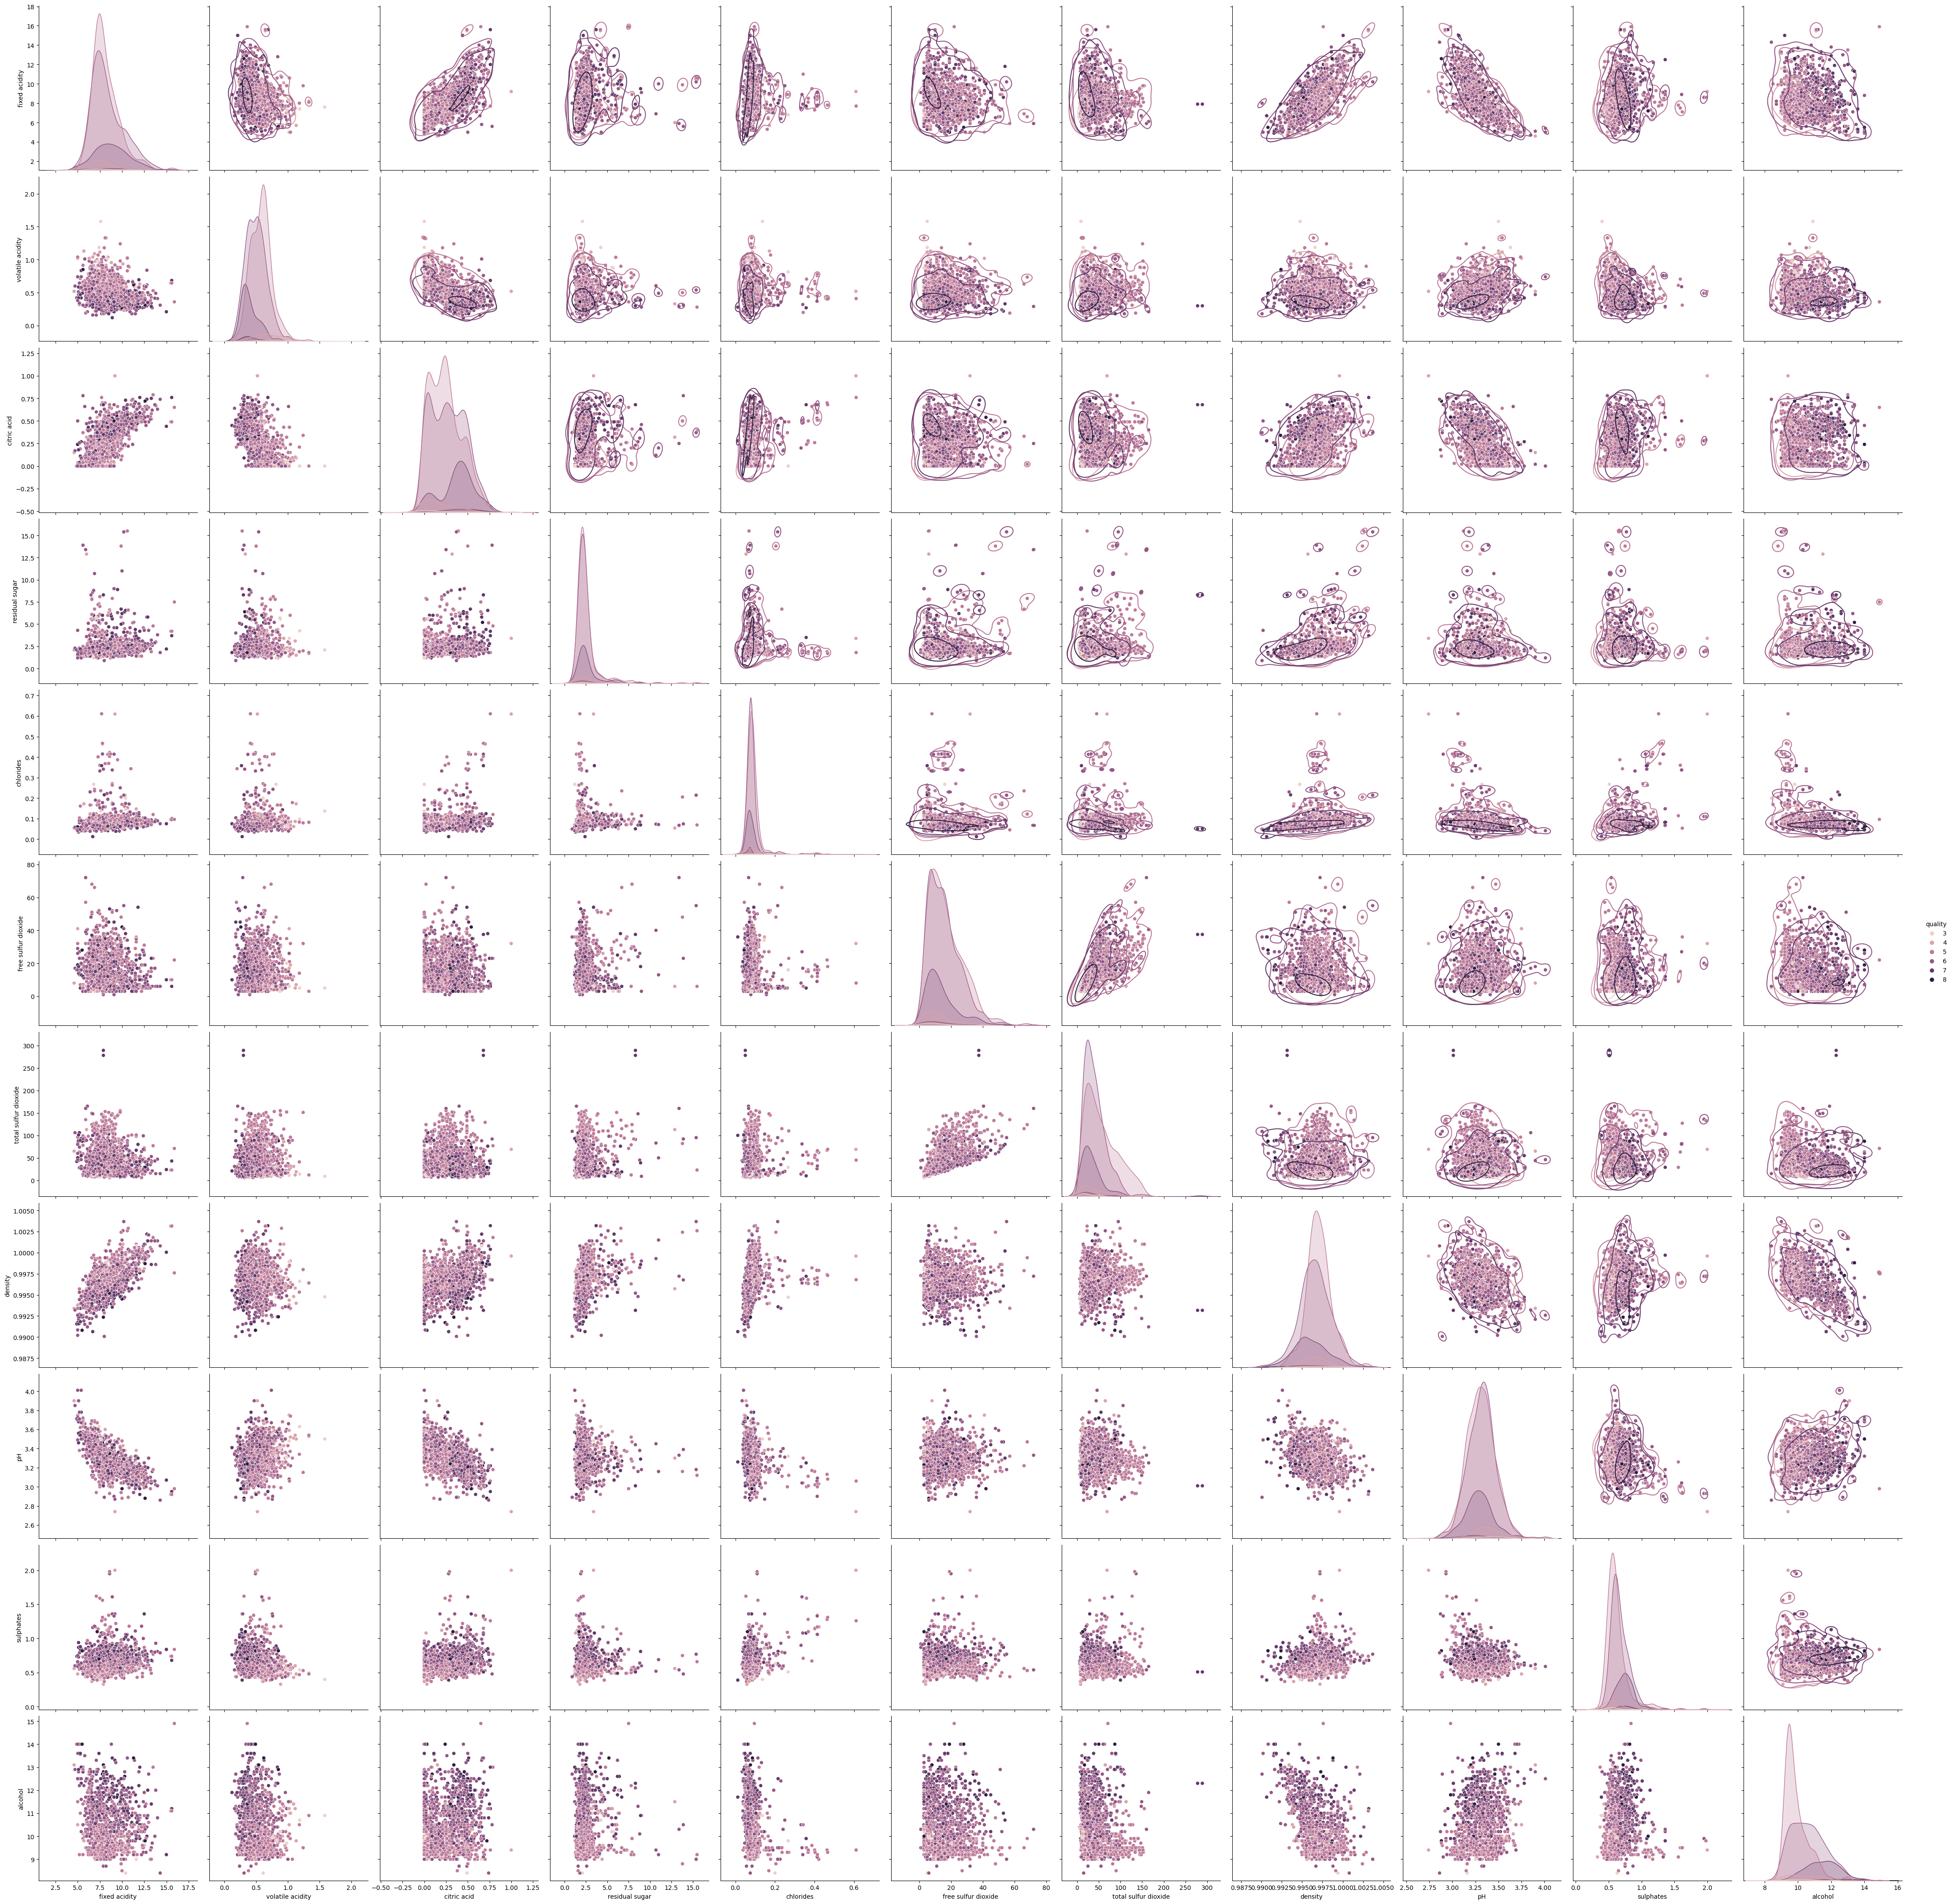

In [10]:
g=sns.pairplot(df,hue='quality',size=4)
g.map_upper(sns.kdeplot,levels=1,color=".2")
plt.show()

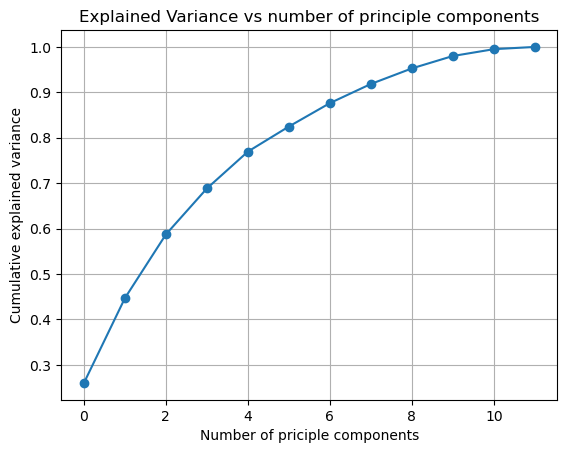

Min number of components to explain 90% of variance 8


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
pca=PCA()
pca.fit(scaled_data)

explained_variance_ratio=pca.explained_variance_ratio_
cum_explained_variance_ratio=explained_variance_ratio.cumsum()
plt.plot(cum_explained_variance_ratio,marker='o')
plt.xlabel('Number of priciple components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs number of principle components')
plt.grid()
plt.show()

n_comp=(cum_explained_variance_ratio>=0.9).argmax()+1
print(f"Min number of components to explain 90% of variance {n_comp}")